# **Districts data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
districts_data = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/districts_info.csv")

In [ ]:
districts_data = districts_data[districts_data.state.notna()].reset_index(drop=True)
districts_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
2,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
4,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


**地區比例分布**
**(左：州地區)**
**(右：地區分類)**

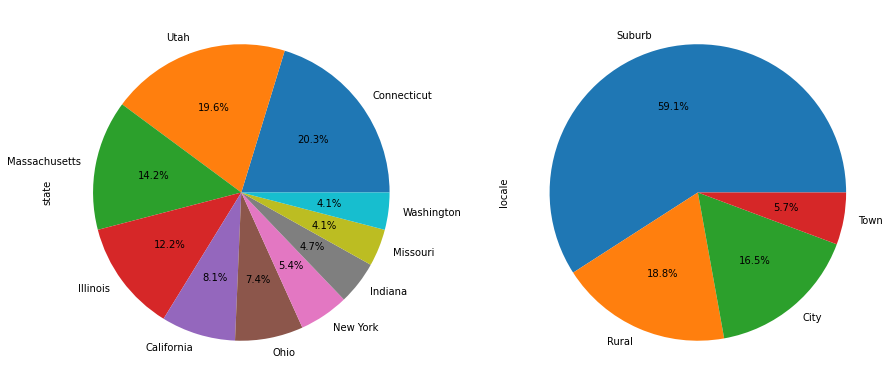

In [ ]:
## Bar ##
# plt.figure(figsize=(6,5))
# sns.countplot(districts_data.state)
# plt.xticks(rotation=90)
## Pie ##

plt.subplot(221)
# districts_data["state"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(10,10), startangle=0) #all
districts_data["state"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(15,15), startangle=0) #前十大
plt.subplot(222)
# districts_data["locale"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(10,10), startangle=0)
districts_data["locale"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(15,15), startangle=0)
plt.show()

**學區資料統計**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



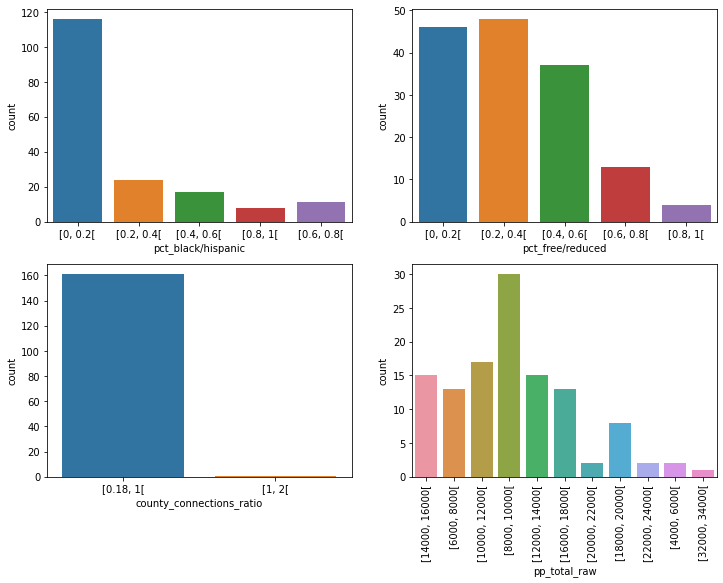

In [ ]:
## 學區資料統計 ##
plt.figure(figsize=(12,18))
plt.subplot(421)
sns.countplot(data= districts_data, x = "pct_black/hispanic") #黑人/西班牙裔 比例

plt.subplot(422)
sns.countplot(data= districts_data, x = "pct_free/reduced") #免費/減免 午餐學區比例

plt.subplot(423)
sns.countplot(data= districts_data, x = "county_connections_ratio") # ?

plt.subplot(424)
sns.countplot(districts_data.pp_total_raw) #每位學生在計畫中的總支出
plt.xticks(rotation=90)

plt.show()

In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
districts_info = districts_data
districts_info['state_abbrev'] = districts_info['state'].replace(us_state_abbrev)
districts_info_by_state = districts_info['state_abbrev'].value_counts().to_frame().reset_index(drop=False)
districts_info_by_state.columns = ['state_abbrev', 'num_districts']

fig = go.Figure()
layout = dict(
    title_text = "Number of Available School Districts per State",
    geo_scope='usa',
)

fig.add_trace(
    go.Choropleth(
        locations=districts_info_by_state.state_abbrev,
        zmax=1,
        z = districts_info_by_state.num_districts,
        locationmode = 'USA-states', # set of locations match entries in `locations`
        marker_line_color='white',
        geo='geo',
        colorscale=px.colors.sequential.Teal, 
    )
)
            
fig.update_layout(layout)   
fig.show()

In [ ]:
def replace_ranges_pct(range_str):
    if range_str == '[0, 0.2[':
        return 0.1
    elif range_str == '[0.2, 0.4[':
        return 0.3
    elif range_str == '[0.4, 0.6[':
        return 0.5
    elif range_str == '[0.6, 0.8[':
        return 0.7
    elif range_str == '[0.8, 1[':
        return 0.9
    else:
        return np.nan
    
def replace_ranges_raw(range_str):
    if range_str == '[4000, 6000[':
        return 5000
    elif range_str == '[6000, 8000[':
        return 7000
    elif range_str == '[8000, 10000[':
        return 9000
    elif range_str == '[10000, 12000[':
        return 11000
    elif range_str ==  '[12000, 14000[':
        return 13000
    elif range_str ==  '[14000, 16000[':
        return 15000
    elif range_str == '[16000, 18000[':
        return 17000
    elif range_str ==  '[18000, 20000[':
        return 19000
    elif range_str ==  '[20000, 22000[':
        return 21000
    elif range_str ==  '[22000, 24000[':
        return 21000
    else: 
        return np.nan
    
districts_info['pct_black_hispanic_num'] = districts_info['pct_black/hispanic'].apply(lambda x: replace_ranges_pct(x))
districts_info['pct_free_reduced_num'] = districts_info['pct_free/reduced'].apply(lambda x: replace_ranges_pct(x))
districts_info['pp_total_raw_num'] = districts_info['pp_total_raw'].apply(lambda x: replace_ranges_raw(x))

def plot_state_mean_for_var(col):
    temp = districts_info.groupby('state_abbrev')[col].mean().to_frame().reset_index(drop=False)

    fig = go.Figure()
    layout = dict(
        title_text = f"Mean {col} per State",
        geo_scope='usa',
    )

    fig.add_trace(
        go.Choropleth(
            locations=temp.state_abbrev,
            zmax=1,
            z = temp[col],
            locationmode = 'USA-states', # set of locations match entries in `locations`
            marker_line_color='white',
            geo='geo',
            colorscale=px.colors.sequential.Teal, 
        )
    )

    fig.update_layout(layout)   
    fig.show()

plot_state_mean_for_var('pct_black_hispanic_num')
plot_state_mean_for_var('pct_free_reduced_num')
plot_state_mean_for_var('pp_total_raw_num')

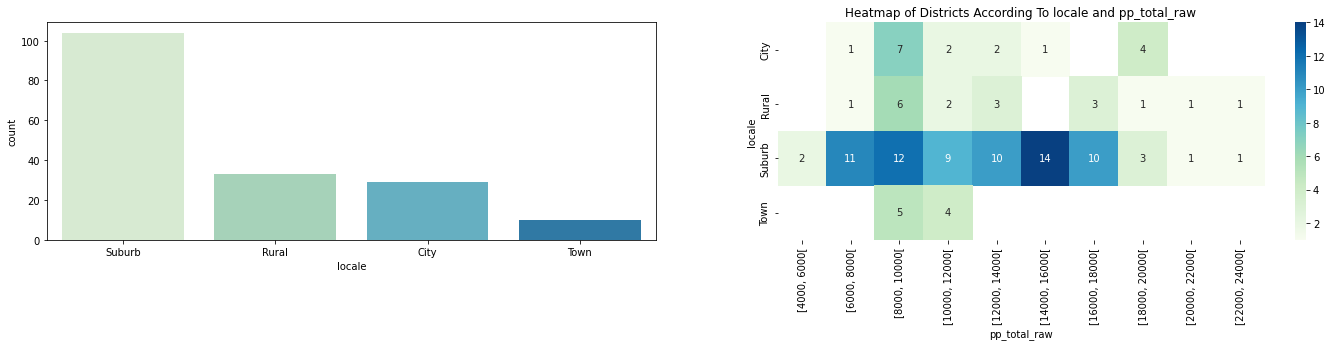

In [ ]:
districts_info.pp_total_raw.unique()
temp = districts_info.groupby('locale').pp_total_raw.value_counts().to_frame()
temp.columns = ['amount']

temp = temp.reset_index(drop=False)

temp = temp.pivot(index='locale', columns='pp_total_raw')['amount']
temp = temp[['[4000, 6000[', '[6000, 8000[', '[8000, 10000[', '[10000, 12000[',
       '[12000, 14000[', '[14000, 16000[', '[16000, 18000[', 
       '[18000, 20000[', '[20000, 22000[', '[22000, 24000[', ]]


fig, ax = plt.subplots(1, 2, figsize=(24,4))

sns.countplot(data=districts_info, x='locale', ax=ax[0], palette='GnBu')

sns.heatmap(temp, annot=True,  cmap='GnBu', ax=ax[1])
ax[1].set_title('Heatmap of Districts According To locale and pp_total_raw')
plt.show()

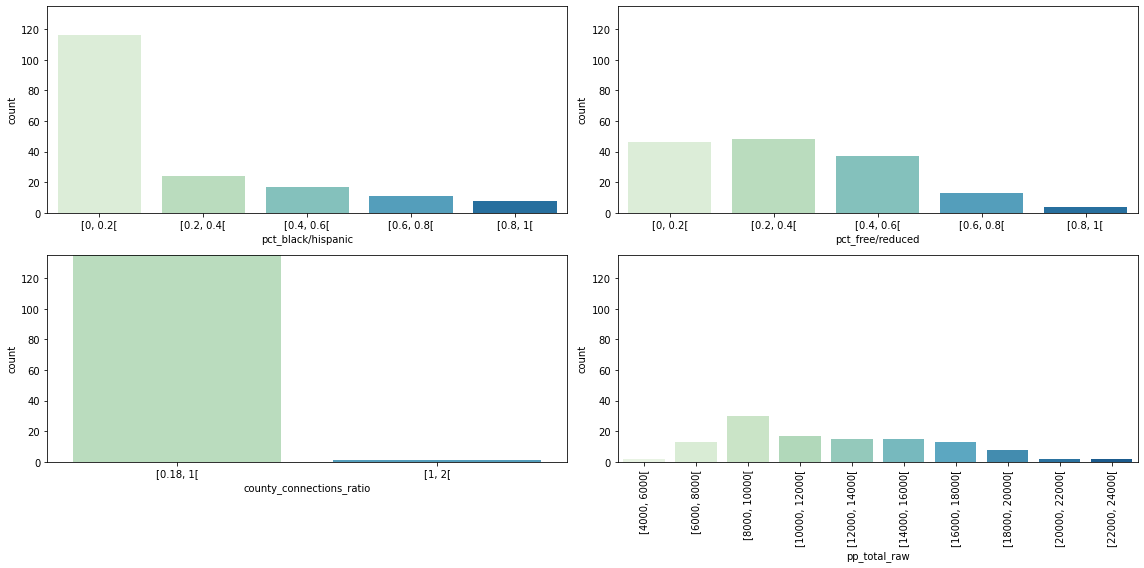

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

sns.countplot(data=districts_info, x='pct_black/hispanic', order=['[0, 0.2[', '[0.2, 0.4[', '[0.4, 0.6[', '[0.6, 0.8[','[0.8, 1[', ], palette='GnBu', ax=ax[0,0])
ax[0,0].set_ylim([0,135])
sns.countplot(data=districts_info, x='pct_free/reduced', order=['[0, 0.2[', '[0.2, 0.4[', '[0.4, 0.6[', '[0.6, 0.8[','[0.8, 1[', ], palette='GnBu', ax=ax[0,1])
ax[0,1].set_ylim([0,135])

sns.countplot(data=districts_info, x='county_connections_ratio', palette='GnBu', ax=ax[1,0])
ax[1,0].set_ylim([0,135])
sns.countplot(data=districts_info, x='pp_total_raw', order=['[4000, 6000[', '[6000, 8000[', '[8000, 10000[', '[10000, 12000[',
       '[12000, 14000[', '[14000, 16000[', '[16000, 18000[', 
       '[18000, 20000[', '[20000, 22000[', '[22000, 24000[', ], palette='GnBu', ax=ax[1,1])
ax[1,1].set_ylim([0,135])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# **Products data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import re

In [ ]:
products_data = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/products_info.csv")
CSV_files = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/CSV_files.csv")

In [ ]:
products_data

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN


**Sector統計(教育年級)**

In [ ]:
ds = products_data['Sector(s)'].value_counts().reset_index()
ds.columns = [
    'Sector(s)', 
    'percent'
]
ds['percent'] /= len(products_data)

fig = px.pie(
    ds, 
    names='Sector(s)', 
    values='percent',
    color_discrete_sequence=px.colors.sequential.Mint,
    title='Distribution of Sector(s) in the District Information Data:', 
    width=700,
    height=500
)
fig.show()

**前十大公司名稱**

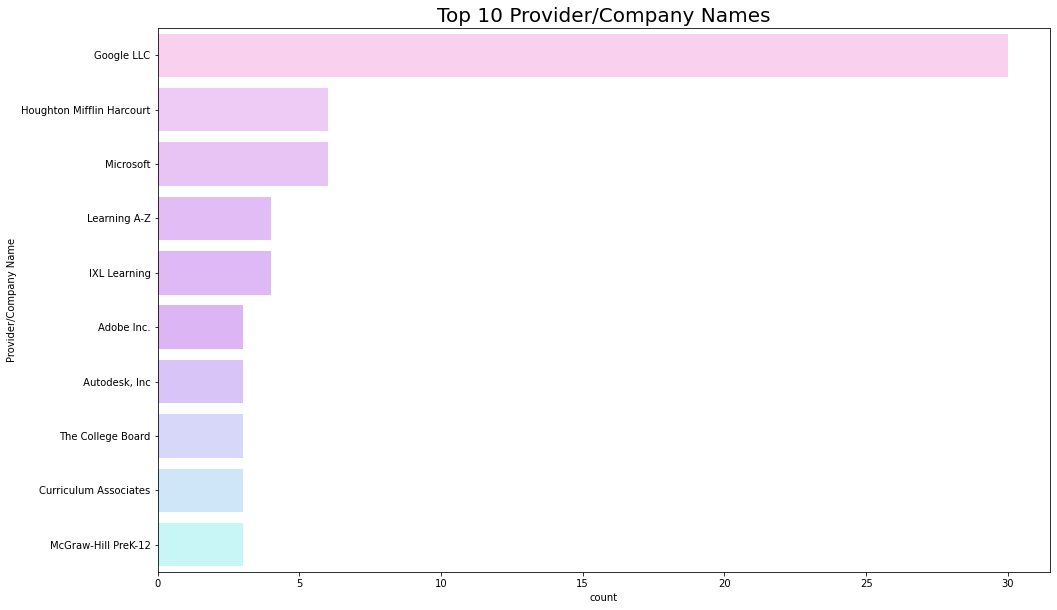

In [ ]:
plt.figure(figsize=(16, 10))
pal2 = ["#ffcbf2","#f3c4fb","#ecbcfd","#e5b3fe","#e2afff","#deaaff","#d8bbff","#d0d1ff","#c8e7ff","#c0fdff"]
sns.countplot(y='Provider/Company Name', data=products_data, order=products_data["Provider/Company Name"].value_counts().index[:10],palette = pal2)
plt.title("Top 10 Provider/Company Names", size=20)
plt.show()

In [ ]:
products_info = products_data
temp_sectors = products_info['Sector(s)'].str.get_dummies(sep="; ")
temp_sectors.columns = [f"sector_{re.sub(' ', '', c)}" for c in temp_sectors.columns]
products_info = products_info.join(temp_sectors)
products_info.drop("Sector(s)", axis=1, inplace=True)
del temp_sectors

products_info['primary_function_main'] = products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_info['primary_function_sub'] = products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
products_info['primary_function_sub'] = products_info['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
products_info.drop("Primary Essential Function", axis=1, inplace=True)

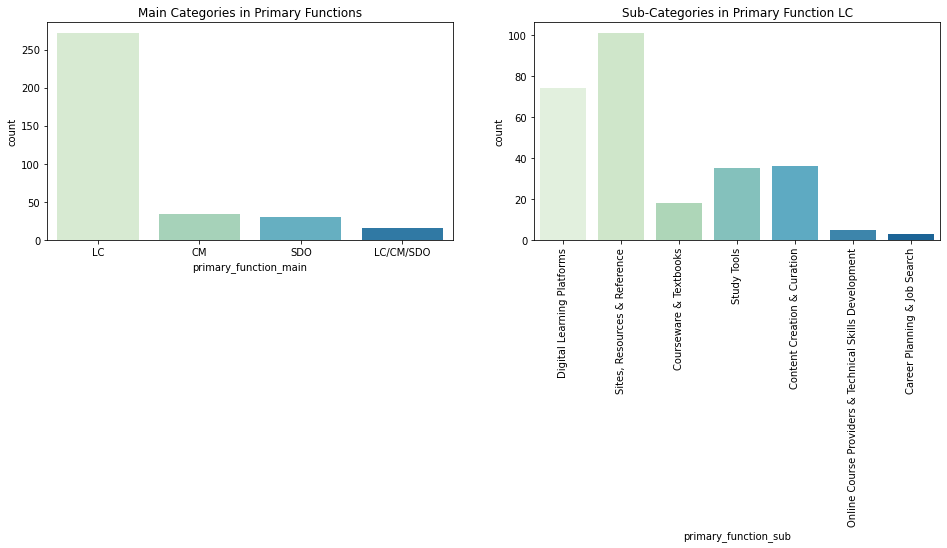

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(data=products_info, x='primary_function_main', palette ='GnBu', ax=ax[0])
ax[0].set_title('Main Categories in Primary Functions')

sns.countplot(data=products_info[products_info.primary_function_main == 'LC'], x='primary_function_sub', palette ='GnBu', ax=ax[1])
ax[1].set_title('Sub-Categories in Primary Function LC')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

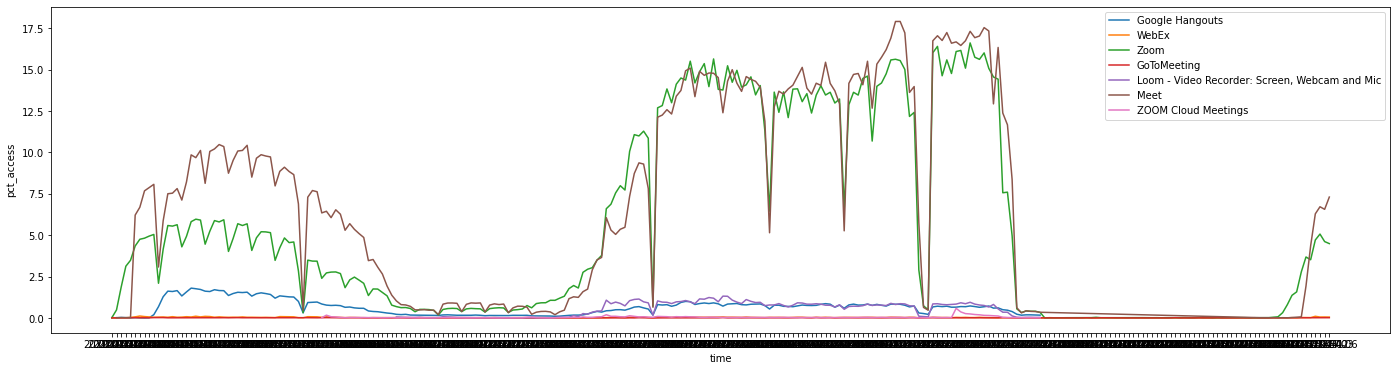

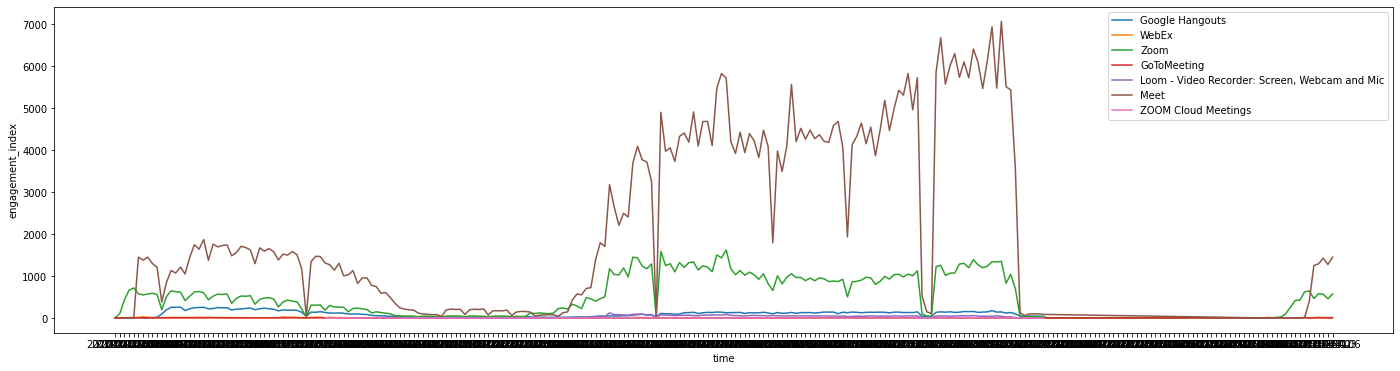

In [ ]:
virtual_classroom_lp_id = products_info[products_info.primary_function_sub == 'Virtual Classroom']['LP ID'].unique()

# Remove weekends from the dataframe
engagement = CSV_files
engagement['weekday'] = pd.DatetimeIndex(engagement['time']).weekday
engagement_without_weekends = engagement[engagement.weekday < 5]

# Figure 1
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for virtual_classroom_product in virtual_classroom_lp_id:
    temp = engagement_without_weekends[engagement_without_weekends.lp_id == virtual_classroom_product].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, y=temp.pct_access, label=products_info[products_info['LP ID'] == virtual_classroom_product]['Product Name'].values[0])
plt.legend()
plt.show()

# Figure 2
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for virtual_classroom_product in virtual_classroom_lp_id:
    temp = engagement_without_weekends[engagement_without_weekends.lp_id == virtual_classroom_product].groupby('time').engagement_index.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, y=temp.engagement_index, label=products_info[products_info['LP ID'] == virtual_classroom_product]['Product Name'].values[0])
plt.legend()
plt.show()

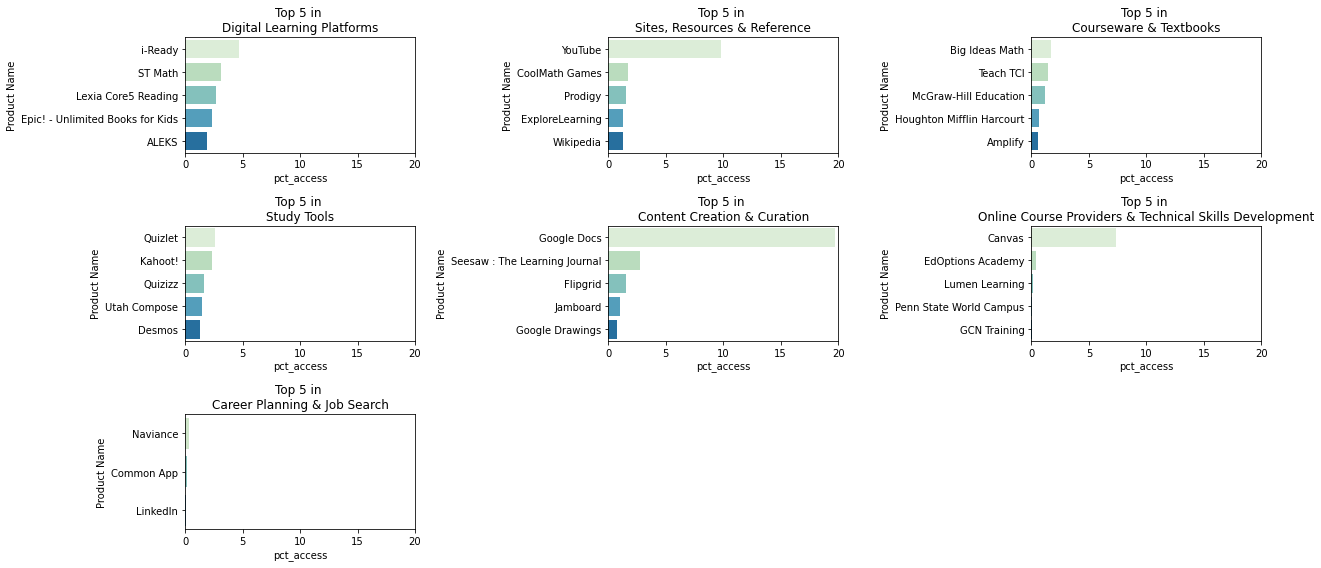

In [ ]:
products_info['lp_id'] = products_info['LP ID'].copy()

f, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 8))

i = 0
j = 0
for subfunction in products_info[products_info.primary_function_main == 'LC'].primary_function_sub.unique():
    lp_ids = products_info[products_info.primary_function_sub == subfunction]['LP ID'].unique()

    temp = engagement_without_weekends[engagement_without_weekends.lp_id.isin(lp_ids)]
    temp = temp.groupby('lp_id').pct_access.mean().sort_values(ascending=False).to_frame().reset_index(drop=False)
    temp = temp.merge(products_info[['lp_id', 'Product Name']], on='lp_id').head()
    
    sns.barplot(data=temp, x='pct_access', y='Product Name', palette='GnBu', ax=ax[i, j])
    
    ax[i, j].set_title(f'Top 5 in \n{subfunction}', fontsize=12)
    ax[i, j].set_xlim([0, 20])
    j = j + 1
    if j == 3:
        i = i + 1
        j = 0
        
f.delaxes(ax[2, 1])
f.delaxes(ax[2, 2])

plt.tight_layout()
plt.show()

# 統計圖

In [ ]:
## https://www.kaggle.com/michau96/most-popular-tools-in-2020-digital-learning

# **Merge all engagement file**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# address = glob.glob('/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/engagement_data/*.csv')

# li = []

# for filename in address:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     district_id = filename.split("/")[9].split(".")[0]
#     df["district_id"] = district_id
#     li.append(df)
    
# CSV_files = pd.concat(li)
# CSV_files = CSV_files.reset_index(drop=True)
# CSV_files.head()
districts_data = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/districts_info_new.csv")
products_data = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/products_info_new.csv")
CSV_files = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/CSV_files.csv")
# full_info_data = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/full_info_data.csv")

In [ ]:
!apt install psmisc
!sudo fuser /dev/nvidia*
# !kill -9 [pid]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
psmisc is already the newest version (23.1-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Specified filename /dev/nvidia* does not exist.


**Merge product_info with CSV_files**

In [ ]:
# Primary Essential Function 產品基本功能 > LC = 學習和課程，CM = 課堂管理, SDO = 學校和學區運營 #
print(products_data["LP ID"].nunique())
print(CSV_files["lp_id"].nunique())
products_engagement_data = pd.merge(products_data, CSV_files, left_on='LP ID', right_on='lp_id')
print('len =',len(products_engagement_data))
products_engagement_data = products_engagement_data.drop(['lp_id'], axis = 1)
products_engagement_data.head()

352
8646
len = 11187783


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,time,pct_access,engagement_index,district_id
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-06,0.03,2.09,1000
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-07,0.00,NaN,1000
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-10,0.03,0.90,1000
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-14,0.00,NaN,1000
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-15,0.00,NaN,1000


**Merge districts_data with CSV_files**

In [ ]:
print(districts_data["district_id"].nunique())
print(CSV_files["district_id"].nunique())
CSV_files["district_id"] = CSV_files["district_id"].astype(str).astype(int)
districts_engagement_data = pd.merge(districts_data, CSV_files, left_on='district_id', right_on='district_id')
print('len =',len(districts_engagement_data))
districts_engagement_data.head()

176
233
len = 17435744


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,engagement_index
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-01-27,32213.0,100.00,3000.00
1,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,90153.0,33.33,2666.67
2,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,99916.0,0.00,NaN
3,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,28504.0,0.00,NaN
4,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,95731.0,33.33,333.33


**Merge all**

In [ ]:
print(CSV_files["lp_id"].nunique())
print(products_data["LP ID"].nunique())
print(districts_data["district_id"].nunique())

full_info_data = pd.merge(districts_engagement_data, products_data, left_on='lp_id', right_on='LP ID')
full_info_data = full_info_data.drop(['lp_id'], axis = 1)
print(len(full_info_data))
full_info_data.head()

8646
352
176
8746514


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,pct_access,engagement_index,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-01-27,100.00,3000.00,32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
1,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-26,25.00,1750.00,32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
2,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-27,73.26,12947.27,32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
3,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-28,7.78,892.04,32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
4,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-29,5.77,643.35,32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)


In [ ]:
from google.colab import files
full_info_data.to_csv('full_info_data.csv',index=False)
files.download('full_info_data.csv')
# del full_info_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# districts_data = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/districts_info_new.csv")
# products_data = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/products_info_new.csv")
# CSV_files = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/CSV_files.csv")
full_info_data = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/full_info_data.csv")

Sorted by district and date

In [ ]:
full_info_data = full_info_data.sort_values(by = ['locale','time']).reset_index(drop=True)
# full_info_data = full_info_data.reset_index()
# full_info_data = full_info_data.drop(['index'], axis = 1)
# full_info_data.head()

Drop useless feature column

In [ ]:
# full_info_data = full_info_data.drop(['URL', 'Product Name', 'Provider/Company Name', 'LP ID'], axis = 1)
# full_info_data = full_info_data.drop(['URL', 'LP ID', 'county_connections_ratio'], axis = 1)
# full_info_data = full_info_data.drop(['Sector(s)', 'Primary Essential Function'], axis = 1)
# full_info_data = full_info_data.drop(['time'], axis = 1)
full_info_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,time,pct_access,engagement_index,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,7457,Washington,City,"[0.4, 0.6[","[0.4, 0.6[","[12000, 14000[",2020-01-01,0.54,29.09,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
1,7614,Utah,City,"[0.2, 0.4[","[0.2, 0.4[","[8000, 10000[",2020-01-01,0.05,5.01,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
2,4569,Connecticut,City,"[0.6, 0.8[","[0.4, 0.6[",NaN,2020-01-01,1.37,167.40,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
3,3222,Indiana,City,"[0.2, 0.4[","[0.6, 0.8[","[8000, 10000[",2020-01-01,0.04,1.14,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
4,9007,Arizona,City,"[0.8, 1[",NaN,NaN,2020-01-01,0.99,25.96,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)


四大區域的區間分布

In [ ]:
distric_id = full_info_data["district_id"].unique()
locale = full_info_data["locale"].unique()    # Region_type = ["Suburb","Town","City","Rural"]
# locale = ['Suburb']
# locale = ['Town']
# locale = ['City']
locale = ['Rural']
target = ['pct_access', 'engagement_index']
date = full_info_data['time'].unique()

In [ ]:
step = 1
for region in locale:
  data = full_info_data[full_info_data['locale'] == region].reset_index(drop=True)
  pct_access_list = []
  engagement_list = []
  day = []

  i = 0
  start = 0
  
  while start < len(date):
    print('start =',start,'end =',min(start+step-1,len(date)-1))
    day.append(date[start])
    interval = data[data['time'] <= date[min(start+step-1,len(date)-1)]]
    interval = interval[interval['time'] >= date[start]].reset_index(drop=True)
    
    # for i in ['pct_black/hispanic']:
    for i in ['pct_free/reduced']:
      # order = interval[i].unique()
      order = ['[0, 0.2[','[0.2, 0.4[','[0.4, 0.6[','[0.6, 0.8[','[0.8, 1[']
      _list1 = []
      _list2 = []
      for o in order:
        _intervel = interval[interval[i] == o]
        if len(_intervel) == 0:
          _list1.append(0)
          _list2.append(0)
          continue
        _list1.append(_intervel['pct_access'].sum())
        _list2.append(_intervel['engagement_index'].sum())

      pct_access_list.append(_list1)
      engagement_list.append(_list2)
    # _list.append(interval['pct_black/hispanic'].value_counts())

    # print(interval[''].value_counts())
    # print(interval['pct_free/reduced'].value_counts())
    # print(interval['pct_black/hispanic'].value_counts(normalize=True))
    # print(interval['pct_free/reduced'].value_counts(normalize=True))
    start+=step

print(len(pct_access_list))
print(len(engagement_list))

In [ ]:
order = ['[0, 0.2[','[0.2, 0.4[','[0.4, 0.6[','[0.6, 0.8[','[0.8, 1[']
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

for i in range(len((order))):
  target = [j[i] for j in pct_access_list]
  plt.plot(target, label=order[i])
  plt.xticks(rotation=90)
ax.legend()
plt.ylabel("count")
name = '%s_pct_access(step=%d)'%(region,step)
plt.title(name)
plt.savefig('%s.png'%name)
plt.show()

In [ ]:
order = ['[0, 0.2[','[0.2, 0.4[','[0.4, 0.6[','[0.6, 0.8[','[0.8, 1[']
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

for i in range(len((order))):
  target = [j[i] for j in engagement_list]
  plt.plot(target, label=order[i])
  plt.xticks(rotation=90)
ax.legend()
plt.ylabel("count")
name = '%s_engagement_index(step=%d)'%(region,step)
plt.title(name)
plt.savefig('%s.png'%name)
plt.show()

# Product analyze

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
full_info_data = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/full_info_data.csv")

In [ ]:
full_info_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,pct_access,engagement_index,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-01-27,100.00,3000.00,32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
1,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-26,25.00,1750.00,32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
2,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-27,73.26,12947.27,32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
3,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-28,7.78,892.04,32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
4,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-29,5.77,643.35,32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)


Drop feature

In [ ]:
full_info_data = full_info_data.drop(['URL', 'LP ID', 'county_connections_ratio', 'time', 'pct_access', 'engagement_index'], axis = 1)
full_info_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
1,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
2,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
3,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
4,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)


One-Hot Encoding the Product Sectors

In [ ]:
temp_sectors = full_info_data['Sector(s)'].str.get_dummies(sep="; ")
temp_sectors.columns = [f"sector_{re.sub(' ', '', c)}" for c in temp_sectors.columns]
full_info_data = full_info_data.join(temp_sectors)
full_info_data.drop("Sector(s)", axis=1, inplace=True)
del temp_sectors

In [ ]:
full_info_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,Product Name,Provider/Company Name,Primary Essential Function,sector_Corporate,sector_HigherEd,sector_PreK-12
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,SDO - Learning Management Systems (LMS),1,1,1
1,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,SDO - Learning Management Systems (LMS),1,1,1
2,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,SDO - Learning Management Systems (LMS),1,1,1
3,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,SDO - Learning Management Systems (LMS),1,1,1
4,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,SDO - Learning Management Systems (LMS),1,1,1


Splitting up the Primary Essential Function

In [ ]:
full_info_data['primary_function_main'] = full_info_data['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
full_info_data['primary_function_sub'] = full_info_data['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
full_info_data['primary_function_sub'] = full_info_data['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
full_info_data.drop("Primary Essential Function", axis=1, inplace=True)

In [ ]:
full_info_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,Product Name,Provider/Company Name,sector_Corporate,sector_HigherEd,sector_PreK-12,primary_function_main,primary_function_sub
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,1,1,1,SDO,Learning Management Systems (LMS)
1,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,1,1,1,SDO,Learning Management Systems (LMS)
2,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,1,1,1,SDO,Learning Management Systems (LMS)
3,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,1,1,1,SDO,Learning Management Systems (LMS)
4,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,1,1,1,SDO,Learning Management Systems (LMS)


In [ ]:
# from google.colab import files
# full_info_data.to_csv('full_info_data.csv',index=False)
# files.download('full_info_data.csv')
# del full_info_data

# District choose

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
full_info_data = pd.read_csv("/content/drive/MyDrive/NTU/1101_class/資料科學/final_project/full_info_data2.csv")

In [ ]:
full_info_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,Product Name,Provider/Company Name,sector_Corporate,sector_HigherEd,sector_PreK-12,primary_function_main,primary_function_sub
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,1,1,1,SDO,Learning Management Systems (LMS)
1,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,1,1,1,SDO,Learning Management Systems (LMS)
2,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,1,1,1,SDO,Learning Management Systems (LMS)
3,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,1,1,1,SDO,Learning Management Systems (LMS)
4,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000[",Google Classroom,Google LLC,1,1,1,SDO,Learning Management Systems (LMS)


In [ ]:
# _full_info_data = full_info_data.sort_values(by = ['district_id']).reset_index(drop=True)
# _full_info_data = _full_info_data.drop(['state', 'locale'], axis = 1)

# _full_info_data = full_info_data.sort_values(by = ['state']).reset_index(drop=True)
# _full_info_data = _full_info_data.drop(['district_id', 'locale'], axis = 1)

# _full_info_data = full_info_data.sort_values(by = ['locale']).reset_index(drop=True)
# _full_info_data = _full_info_data.drop(['district_id', 'state', 'Product Name'], axis = 1)
# _full_info_data = _full_info_data.drop(['Provider/Company Name'], axis = 1)
# _full_info_data.head()

In [ ]:
distric_id = sorted(full_info_data["district_id"].unique())
state = full_info_data["state"].unique()
locale = full_info_data["locale"].unique()
print('distric_id =',distric_id,len(distric_id))
print('state    =',state,len(state))
print('locale   =',locale,len(locale))

distric_id = [1000, 1044, 1052, 1142, 1204, 1270, 1324, 1444, 1450, 1470, 1536, 1549, 1558, 1570, 1705, 1712, 1742, 1772, 1791, 1857, 1877, 1904, 1965, 2060, 2074, 2106, 2130, 2165, 2167, 2172, 2201, 2257, 2285, 2321, 2393, 2439, 2441, 2517, 2567, 2598, 2601, 2729, 2779, 2870, 2872, 2940, 2956, 2991, 3080, 3160, 3222, 3228, 3248, 3266, 3314, 3322, 3412, 3550, 3558, 3640, 3668, 3670, 3692, 3710, 3732, 3772, 3864, 3936, 3986, 4031, 4051, 4083, 4183, 4314, 4348, 4373, 4516, 4520, 4550, 4569, 4602, 4629, 4668, 4683, 4744, 4775, 4808, 4921, 4929, 4936, 4949, 5006, 5042, 5150, 5231, 5422, 5479, 5510, 5524, 5527, 5600, 5604, 5627, 5802, 5882, 5890, 5934, 5987, 6046, 6055, 6104, 6144, 6194, 6250, 6345, 6418, 6512, 6577, 6584, 6640, 6762, 6919, 6998, 7164, 7177, 7305, 7308, 7342, 7387, 7457, 7541, 7614, 7660, 7675, 7723, 7741, 7752, 7767, 7785, 7798, 7964, 7970, 7975, 7980, 8076, 8103, 8127, 8256, 8328, 8425, 8433, 8520, 8539, 8556, 8748, 8784, 8815, 8884, 8902, 8937, 9007, 9043, 9140, 9230, 93

**DecisionTreeClassifier**

In [ ]:
# _full_info_data = full_info_data.drop(['state', 'district_id'], axis = 1)
# _full_info_data = _full_info_data.drop(['Product Name','Provider/Company Name'], axis = 1)
# data = _full_info_data[_full_info_data['locale'] == 'Suburb'].reset_index(drop=True)

primary_function_main_label, primary_function_sub_label = full_info_data['primary_function_main'].unique(), full_info_data['primary_function_sub'].unique()
dict_1, dict_2 = {}, {}
for i,name in enumerate(primary_function_main_label):
  dict_1[name] = i
for i,name in enumerate(primary_function_sub_label):
  dict_2[name] = i

print(dict_1)
print(dict_2)

{'SDO': 0, 'LC': 1, 'LC/CM/SDO': 2, 'CM': 3}
{'Learning Management Systems (LMS)': 0, 'Sites, Resources & Reference': 1, 'Other': 2, 'Content Creation & Curation': 3, 'Digital Learning Platforms': 4, 'Classroom Engagement & Instruction': 5, 'Courseware & Textbooks': 6, 'Teacher Resources': 7, 'Study Tools': 8, 'Online Course Providers & Technical Skills Development': 9, 'Data, Analytics & Reporting': 10, 'Large-Scale & Standardized Testing': 11, 'School Management Software': 12, 'Human Resources': 13, 'Career Planning & Job Search': 14, 'Virtual Classroom': 15, 'Admissions, Enrollment & Rostering': 16, 'Environmental, Health & Safety (EHS) Compliance': 17}


In [ ]:
region_types = [locale, state, distric_id]
region_types_name = ['locale', 'state', 'district_id']
result_DecisionTree_prime, result_DecisionTree_sub = [], []
for i, region in enumerate(region_types):
  print('/'*50)
  print('region =',region)
  acc_y1 = []
  acc_y2 = []
  for _region in region:
    print('='*40)
    print('_region =',_region)

    drop_name = [k for k in region_types_name if k != region_types_name[i]]
    _full_info_data = full_info_data.drop(drop_name, axis = 1)
    _full_info_data = _full_info_data.drop(['Product Name', 'Provider/Company Name', 'sector_Corporate', 'sector_HigherEd', 'sector_PreK-12'], axis = 1)    # pct_black/hispanic	pct_free/reduced	pp_total_raw
    data = _full_info_data[_full_info_data[region_types_name[i]] == _region].reset_index(drop=True)

    y1, y2 = data['primary_function_main'].map(dict_1), data['primary_function_sub'].map(dict_2)
  
    data = data.drop([region_types_name[i], 'primary_function_main', 'primary_function_sub'], axis = 1) # 加上Provider/Company Name看效果
    data = pd.get_dummies(data, columns=['pp_total_raw', 'pct_free/reduced', "pct_black/hispanic"])

    train_X1, test_X1, train_y1, test_y1 = train_test_split(data, y1, test_size = 0.1)
    clf_y1 = tree.DecisionTreeClassifier()
    _clf_y1 = clf_y1.fit(train_X1, train_y1)
    test_y1_predicted = _clf_y1.predict(test_X1)
    accuracy_y1 = metrics.accuracy_score(test_y1, test_y1_predicted)
    print('accuracy_y1 =',accuracy_y1)
    acc_y1.append(accuracy_y1)

    train_X2, test_X2, train_y2, test_y2 = train_test_split(data, y2, test_size = 0.1)
    clf_y2 = tree.DecisionTreeClassifier()
    _clf_y2 = clf_y2.fit(train_X2, train_y2)
    test_y2_predicted = _clf_y2.predict(test_X2)
    accuracy_y2 = metrics.accuracy_score(test_y2, test_y2_predicted)
    print('accuracy_y2 =', accuracy_y2)
    acc_y2.append(accuracy_y2)
    del train_X1, test_X1, train_y1, test_y1, clf_y1, _clf_y1, test_y1_predicted, accuracy_y1
    del train_X2, test_X2, train_y2, test_y2, clf_y2, _clf_y2, test_y2_predicted, accuracy_y2, data, y1, y2
  result_DecisionTree_prime.append(acc_y1)
  result_DecisionTree_sub.append(acc_y2)
print('='*40)
print('result_DecisionTree_prime',len(result_DecisionTree_prime))
print('result_DecisionTree_sub',len(result_DecisionTree_sub))

//////////////////////////////////////////////////
region = ['Suburb' 'Rural' 'City' 'Town']
_region = Suburb


In [ ]:
print('distric_id =',distric_id,len(distric_id))
print('staate    =',state,len(state))
print('locale   =',locale,len(locale))
# region_types = [locale, state, distric_id]
# region_types_name = ['locale', 'state', 'district_id']

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))

for i in range(len(result_DecisionTree_prime)):
  plt.subplot(321+i*2)
  x = np.arange(len(result_DecisionTree_prime[i]))
  plt.bar(x, result_DecisionTree_prime[i])
  plt.xticks(x, region_types[i], rotation=90)
  plt.ylim(0,1.0)
  plt.gca().set_title('Mean = %f'%np.mean(result_DecisionTree_prime[i]))

  plt.subplot(321+i*2+1)
  x = np.arange(len(result_DecisionTree_sub[i]))
  plt.bar(x, result_DecisionTree_sub[i])
  plt.xticks(x, region_types[i], rotation=90)
  plt.ylim(0,1.0)
  plt.gca().set_title('Mean = %f'%np.mean(result_DecisionTree_sub[i]))

plt.tight_layout()
plt.show()

**Random Forests (BaggingClassifier)**

In [ ]:
region_types = [locale, state, distric_id]
region_types_name = ['locale', 'state', 'district_id']
result_Bagging_prime, result_Random_Forests_sub = [], []
for i, region in enumerate(region_types):
  print('/'*50)
  print('region =',region)
  acc_y1 = []
  acc_y2 = []
  for _region in region:
    print('='*40)
    print('_region =',_region)

    drop_name = [k for k in region_types_name if k != region_types_name[i]]
    _full_info_data = full_info_data.drop(drop_name, axis = 1)
    _full_info_data = _full_info_data.drop(['Product Name','Provider/Company Name'], axis = 1)
    data = _full_info_data[_full_info_data[region_types_name[i]] == _region].reset_index(drop=True)
    
    y1, y2 = data['primary_function_main'].map(dict_1), data['primary_function_sub'].map(dict_2)
    data = data.drop([region_types_name[i], 'primary_function_main', 'primary_function_sub'], axis = 1) # 加上Provider/Company Name看效果
    data = pd.get_dummies(data, columns=["pct_black/hispanic", 'pct_free/reduced', 'pp_total_raw'])


    train_X1, test_X1, train_y1, test_y1 = train_test_split(data, y1, test_size = 0.2)
    clf_y1 = tree.DecisionTreeClassifier()
    bag_y1 = BaggingClassifier(clf_y1, n_estimators=10, max_samples=0.8,
                          random_state=1)
    bag_y1 = bag_y1.fit(train_X1, train_y1)
    test_y1_predicted = bag_y1.predict(test_X1)
    accuracy_y1 = metrics.accuracy_score(test_y1, test_y1_predicted)
    print('accuracy_y1 =',accuracy_y1)
    acc_y1.append(accuracy_y1)
    del train_X1, test_X1, train_y1, test_y1, clf_y1, bag_y1, test_y1_predicted, accuracy_y1

    train_X2, test_X2, train_y2, test_y2 = train_test_split(data, y2, test_size = 0.2)
    clf_y2 = tree.DecisionTreeClassifier()
    bag_y2 = BaggingClassifier(clf_y2, n_estimators=10, max_samples=0.8,
                          random_state=1)
    bag_y2 = bag_y2.fit(train_X2, train_y2)
    test_y2_predicted = bag_y2.predict(test_X2)
    accuracy_y2 = metrics.accuracy_score(test_y2, test_y2_predicted)
    print('accuracy_y2 =', accuracy_y2)
    acc_y2.append(accuracy_y2)
    del train_X2, test_X2, train_y2, test_y2, clf_y2, bag_y2, test_y2_predicted, accuracy_y2, data, y1, y2

  result_Bagging_prime.append(acc_y1)
  result_Bagging_sub.append(acc_y2)

print('='*40)
print('result_Bagging_prime',len(result_Bagging_prime))
print('result_Bagging_sub',len(result_Bagging_sub))

In [ ]:
print(len(result_Bagging_prime))
print(len(result_Bagging_sub))

fig, ax = plt.subplots(figsize=(18,12))
for i in range(len(result_Bagging_prime)):
  plt.subplot(321+i*2)
  x = np.arange(len(result_Bagging_prime[i]))
  plt.bar(x, result_Bagging_prime[i])
  plt.xticks(x, region_types[i], rotation=90)
  plt.ylim(0,1.0)
  plt.gca().set_title('Mean = %f'%np.mean(result_Bagging_prime[i]))

  plt.subplot(321+i*2+1)
  x = np.arange(len(result_Bagging_sub[i]))
  plt.bar(x, result_Bagging_sub[i])
  plt.xticks(x, region_types[i], rotation=90)
  plt.ylim(0,1.0)
  plt.gca().set_title('Mean = %f'%np.mean(result_Bagging_sub[i]))

plt.tight_layout()
plt.show()

**RandomForestRegressor**

In [ ]:
region_types = [locale, state, distric_id]
region_types_name = ['locale', 'state', 'district_id']
result_RandomForest_prime, result_RandomForest_sub = [], []
for i, region in enumerate(region_types):
  print('/'*50)
  print('region =',region)
  acc_y1 = []
  acc_y2 = []
  for _region in region:
    print('='*40)
    print('_region =',_region)
    
    drop_name = [k for k in region_types_name if k != region_types_name[i]]
    _full_info_data = full_info_data.drop(drop_name, axis = 1)
    _full_info_data = _full_info_data.drop(['Product Name','Provider/Company Name'], axis = 1)
    data = _full_info_data[_full_info_data[region_types_name[i]] == _region].reset_index(drop=True)

    y1, y2 = data['primary_function_main'].map(dict_1), data['primary_function_sub'].map(dict_2)
    data = data.drop([region_types_name[i], 'primary_function_main', 'primary_function_sub'], axis = 1) # 加上Provider/Company Name看效果
    data = pd.get_dummies(data, columns=["pct_black/hispanic", 'pct_free/reduced', 'pp_total_raw'])

    train_X1, test_X1, train_y1, test_y1 = train_test_split(data, y1, test_size = 0.2)
    clf_y1 = RandomForestClassifier(n_estimators = 10)
    _clf_y1 = clf_y1.fit(train_X1, train_y1)

    test_y1_predicted = _clf_y1.predict(test_X1)
    accuracy_y1 = metrics.accuracy_score(test_y1, test_y1_predicted)
    print('accuracy_y1 =',accuracy_y1)
    acc_y1.append(accuracy_y1)

    train_X2, test_X2, train_y2, test_y2 = train_test_split(data, y2, test_size = 0.2)
    clf_y2 = RandomForestClassifier(n_estimators = 10)
    _clf_y2 = clf_y2.fit(train_X2, train_y2)

    test_y2_predicted = _clf_y2.predict(test_X2)
    accuracy_y2 = metrics.accuracy_score(test_y2, test_y2_predicted)
    print('accuracy_y2 =', accuracy_y2)
    acc_y2.append(accuracy_y2)
    del train_X1, test_X1, train_y1, test_y1, clf_y1, _clf_y1, test_y1_predicted, accuracy_y1
    del train_X2, test_X2, train_y2, test_y2, clf_y2, _clf_y2, test_y2_predicted, accuracy_y2, data, y1, y2
  result_RandomForest_prime.append(acc_y1)
  result_RandomForest_sub.append(acc_y2)
print('='*40)
print('result_RandomForest_prime',len(result_RandomForest_prime))
print('result_RandomForest_sub',len(result_RandomForest_sub))

In [ ]:
print(len(result_RandomForest_prime))
print(len(result_RandomForest_sub))

fig, ax = plt.subplots(figsize=(18,12))
for i in range(len(result_RandomForest_prime)):
  plt.subplot(321+i*2)
  x = np.arange(len(result_RandomForest_prime[i]))
  plt.bar(x, result_RandomForest_prime[i])
  plt.xticks(x, region_types[i], rotation=90)
  plt.ylim(0,1.0)
  plt.gca().set_title('Mean = %f'%np.mean(result_RandomForest_prime[i]))

  plt.subplot(321+i*2+1)
  x = np.arange(len(result_RandomForest_sub[i]))
  plt.bar(x, result_RandomForest_sub[i])
  plt.xticks(x, region_types[i], rotation=90)
  plt.ylim(0,1.0)
  plt.gca().set_title('Mean = %f'%np.mean(result_RandomForest_sub[i]))

plt.tight_layout()
plt.show()

**高斯貝氏分類器 GaussianNB**

In [ ]:
region_types = [locale, state, distric_id]
region_types_name = ['locale', 'state', 'district_id']
result_GaussianNB_prime, result_GaussianNB_sub = [], []
for i, region in enumerate(region_types):
  print('/'*50)
  print('region =',region)
  acc_y1 = []
  acc_y2 = []
  for _region in region:
    print('='*40)
    print('_region =',_region)
    
    drop_name = [k for k in region_types_name if k != region_types_name[i]]
    _full_info_data = full_info_data.drop(drop_name, axis = 1)
    _full_info_data = _full_info_data.drop(['Product Name','Provider/Company Name'], axis = 1)
    data = _full_info_data[_full_info_data[region_types_name[i]] == _region].reset_index(drop=True)

    y1, y2 = data['primary_function_main'].map(dict_1), data['primary_function_sub'].map(dict_2)
    data = data.drop([region_types_name[i], 'primary_function_main', 'primary_function_sub'], axis = 1) # 加上Provider/Company Name看效果
    data = pd.get_dummies(data, columns=["pct_black/hispanic", 'pct_free/reduced', 'pp_total_raw'])

    train_X1, test_X1, train_y1, test_y1 = train_test_split(data, y1, test_size = 0.2)
    clf_y1 = MultinomialNB()
    _clf_y1 = clf_y1.fit(train_X1, train_y1)

    test_y1_predicted = _clf_y1.predict(test_X1)
    accuracy_y1 = metrics.accuracy_score(test_y1, test_y1_predicted)
    print('accuracy_y1 =',accuracy_y1)
    acc_y1.append(accuracy_y1)

    train_X2, test_X2, train_y2, test_y2 = train_test_split(data, y2, test_size = 0.2)
    clf_y2 = MultinomialNB()
    _clf_y2 = clf_y2.fit(train_X2, train_y2)

    test_y2_predicted = _clf_y2.predict(test_X2)
    accuracy_y2 = metrics.accuracy_score(test_y2, test_y2_predicted)
    print('accuracy_y2 =', accuracy_y2)
    acc_y2.append(accuracy_y2)
    del train_X1, test_X1, train_y1, test_y1, clf_y1, _clf_y1, test_y1_predicted, accuracy_y1
    del train_X2, test_X2, train_y2, test_y2, clf_y2, _clf_y2, test_y2_predicted, accuracy_y2, data, y1, y2
  result_GaussianNB_prime.append(acc_y1)
  result_GaussianNB_sub.append(acc_y2)
print('='*40)
print('result_GaussianNB_prime',len(result_1111))
print('result_GaussianNB_sub',len(result_GaussianNB_sub))

3
3


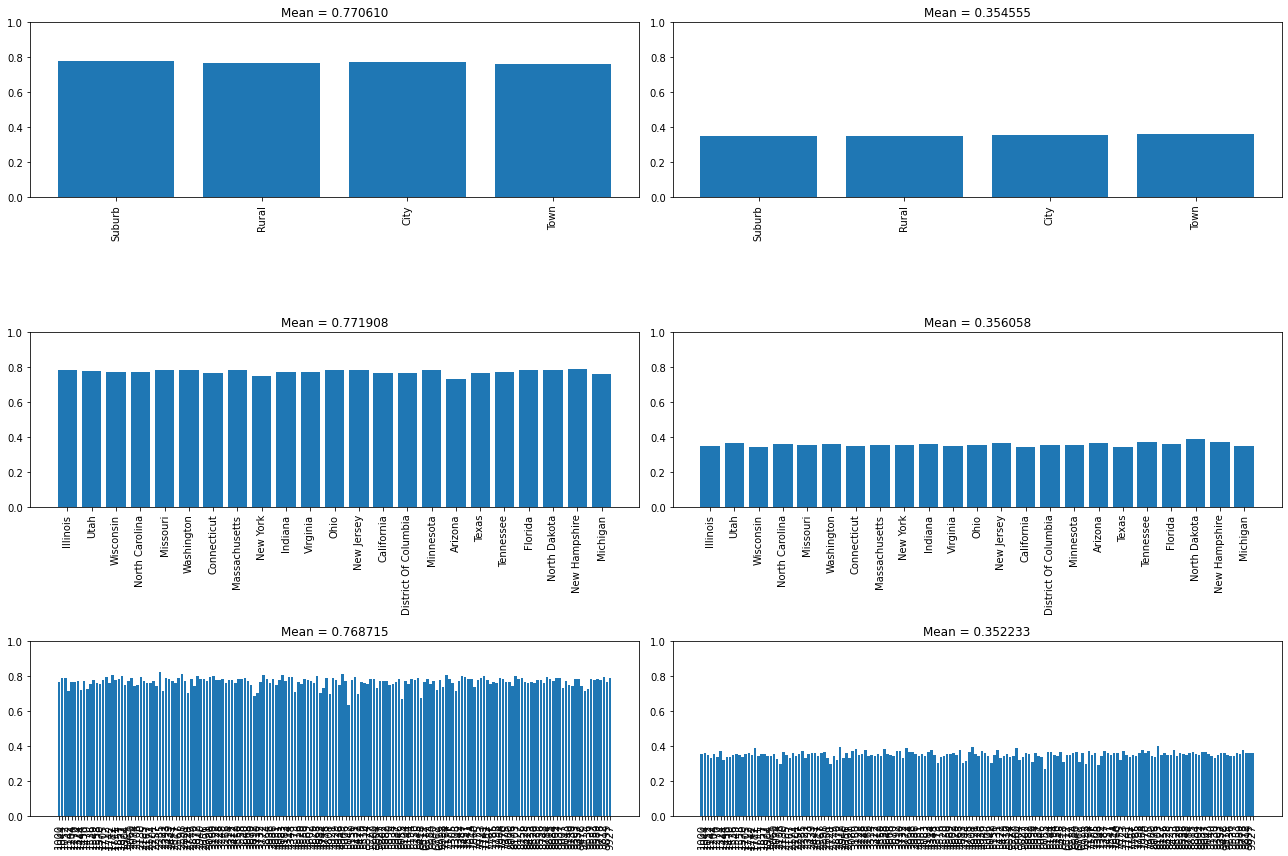

In [ ]:
print(len(result_GaussianNB_prime))
print(len(result_GaussianNB_sub))

fig, ax = plt.subplots(figsize=(18,12))
for i in range(len(result_GaussianNB_prime)):
  plt.subplot(321+i*2)
  x = np.arange(len(result_GaussianNB_prime[i]))
  plt.bar(x, result_GaussianNB_prime[i])
  plt.xticks(x, region_types[i], rotation=90)
  plt.ylim(0,1.0)
  plt.gca().set_title('Mean = %f'%np.mean(result_GaussianNB_prime[i]))

  plt.subplot(321+i*2+1)
  x = np.arange(len(result_GaussianNB_sub[i]))
  plt.bar(x, result_GaussianNB_sub[i])
  plt.xticks(x, region_types[i], rotation=90)
  plt.ylim(0,1.0)
  plt.gca().set_title('Mean = %f'%np.mean(result_GaussianNB_sub[i]))

plt.tight_layout()
plt.show()

**多項式貝氏分類器 MultinomialNB**

In [ ]:
region_types = [locale, state, distric_id]
region_types_name = ['locale', 'state', 'district_id']
result_MultinomialNB_prime, result_MultinomialNB_sub = [], []
for i, region in enumerate(region_types):
  print('/'*50)
  print('region =',region)
  acc_y1 = []
  acc_y2 = []
  for _region in region:
    print('='*40)
    print('_region =',_region)
    
    drop_name = [k for k in region_types_name if k != region_types_name[i]]
    _full_info_data = full_info_data.drop(drop_name, axis = 1)
    _full_info_data = _full_info_data.drop(['Product Name','Provider/Company Name'], axis = 1)
    data = _full_info_data[_full_info_data[region_types_name[i]] == _region].reset_index(drop=True)

    y1, y2 = data['primary_function_main'].map(dict_1), data['primary_function_sub'].map(dict_2)
    data = data.drop([region_types_name[i], 'primary_function_main', 'primary_function_sub'], axis = 1) # 加上Provider/Company Name看效果
    data = pd.get_dummies(data, columns=["pct_black/hispanic", 'pct_free/reduced', 'pp_total_raw'])

    train_X1, test_X1, train_y1, test_y1 = train_test_split(data, y1, test_size = 0.2)
    clf_y1 = MultinomialNB()
    _clf_y1 = clf_y1.fit(train_X1, train_y1)

    test_y1_predicted = _clf_y1.predict(test_X1)
    accuracy_y1 = metrics.accuracy_score(test_y1, test_y1_predicted)
    print('accuracy_y1 =',accuracy_y1)
    acc_y1.append(accuracy_y1)

    train_X2, test_X2, train_y2, test_y2 = train_test_split(data, y2, test_size = 0.2)
    clf_y2 = MultinomialNB()
    _clf_y2 = clf_y2.fit(train_X2, train_y2)

    test_y2_predicted = _clf_y2.predict(test_X2)
    accuracy_y2 = metrics.accuracy_score(test_y2, test_y2_predicted)
    print('accuracy_y2 =', accuracy_y2)
    acc_y2.append(accuracy_y2)
    del train_X1, test_X1, train_y1, test_y1, clf_y1, _clf_y1, test_y1_predicted, accuracy_y1
    del train_X2, test_X2, train_y2, test_y2, clf_y2, _clf_y2, test_y2_predicted, accuracy_y2, data, y1, y2
  result_MultinomialNB_prime.append(acc_y1)
  result_MultinomialNB_sub.append(acc_y2)
print('='*40)
print('result_MultinomialNB_prime',len(result_MultinomialNB_prime))
print('result_MultinomialNB_sub',len(result_MultinomialNB_sub))

//////////////////////////////////////////////////
region = ['Suburb' 'Rural' 'City' 'Town']
_region = Suburb
accuracy_y1 = 0.7776849024211042
accuracy_y2 = 0.352510715149442
_region = Rural
accuracy_y1 = 0.7663013792813681
accuracy_y2 = 0.3480250417298503
_region = City
accuracy_y1 = 0.7757642338555598
accuracy_y2 = 0.3550152846771112
_region = Town
accuracy_y1 = 0.7646716754669582
accuracy_y2 = 0.3587146146867949
//////////////////////////////////////////////////
region = ['Illinois' 'Utah' 'Wisconsin' 'North Carolina' 'Missouri' 'Washington'
 'Connecticut' 'Massachusetts' 'New York' 'Indiana' 'Virginia' 'Ohio'
 'New Jersey' 'California' 'District Of Columbia' 'Minnesota' 'Arizona'
 'Texas' 'Tennessee' 'Florida' 'North Dakota' 'New Hampshire' 'Michigan']
_region = Illinois
accuracy_y1 = 0.7823150220459145
accuracy_y2 = 0.3481914309071659
_region = Utah
accuracy_y1 = 0.7778720107643066
accuracy_y2 = 0.3638376383763838
_region = Wisconsin
accuracy_y1 = 0.7757258279321673
accuracy_y2 = 

3
3


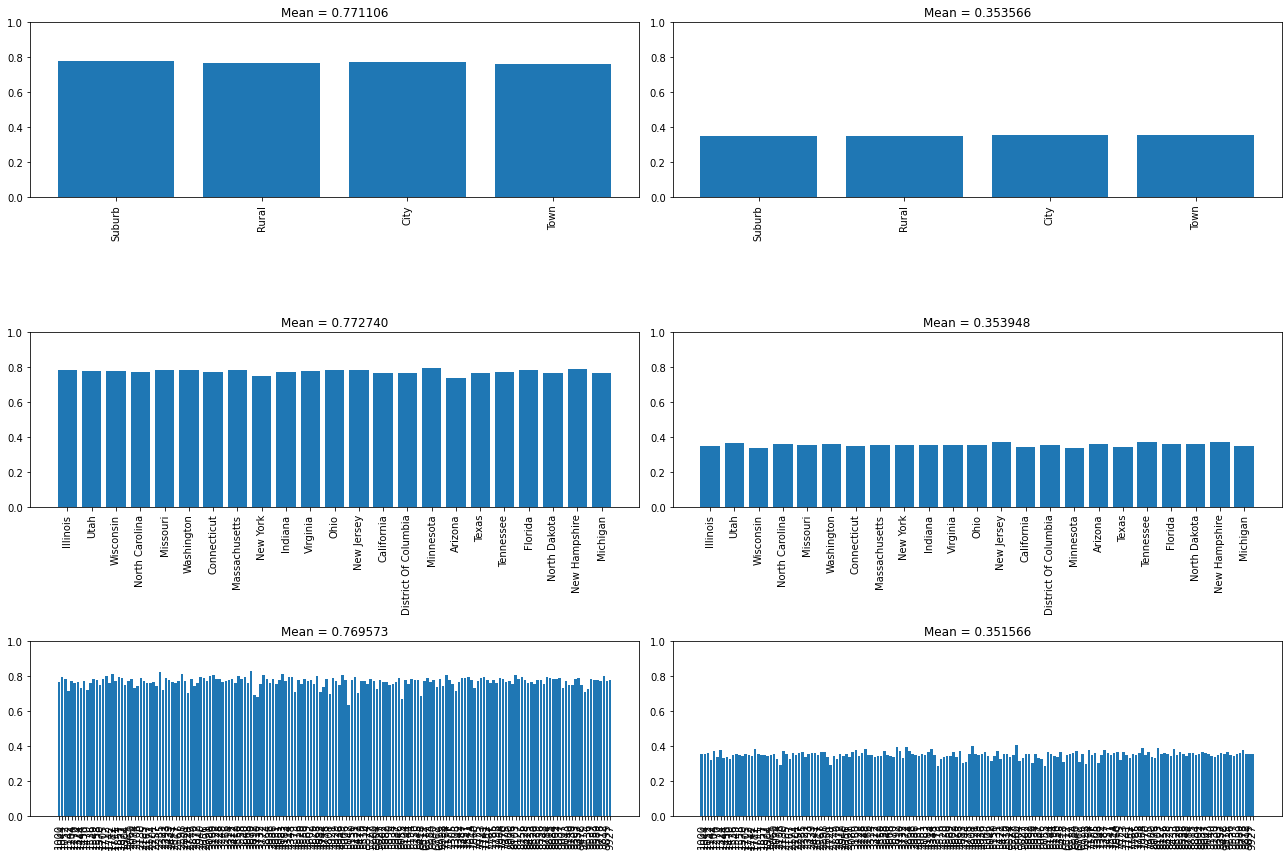

In [ ]:
print(len(result_MultinomialNB_prime))
print(len(result_22222))

fig, ax = plt.subplots(figsize=(18,12))
for i in range(len(result_MultinomialNB_prime)):
  plt.subplot(321+i*2)
  x = np.arange(len(result_MultinomialNB_prime[i]))
  plt.bar(x, result_MultinomialNB_prime[i])
  plt.xticks(x, region_types[i], rotation=90)
  plt.ylim(0,1.0)
  plt.gca().set_title('Mean = %f'%np.mean(result_MultinomialNB_prime[i]))

  plt.subplot(321+i*2+1)
  x = np.arange(len(result_22222[i]))
  plt.bar(x, result_22222[i])
  plt.xticks(x, region_types[i], rotation=90)
  plt.ylim(0,1.0)
  plt.gca().set_title('Mean = %f'%np.mean(result_22222[i]))

plt.tight_layout()
plt.show()